In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import models,datasets,layers

In [10]:
df=pd.read_csv(r"C:\Users\RINNY\Downloads\insurance_data\insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [13]:
from sklearn.model_selection import train_test_split

In [54]:
y=df['bought_insurance']
x=df.drop(columns='bought_insurance')

In [56]:
xtrain,ytrain,xtest,ytest=train_test_split(x,y,test_size=0.20,random_state=45)

In [58]:
xtrainscaling=xtrain/10

In [60]:
xtrainscaling

,age
7,6.0
9,6.1
23,4.5
6,5.5
19,1.8
20,2.1
2,4.7
12,2.7
5,5.6
17,5.8


In [62]:
print("the shape of xtrain is",xtrain.shape)
print("the shape of xtest is ",xtest.shape)
print("the shape of ytrain is ",ytrain.shape)
print("the shape of ytest is ",ytest.shape)

the shape of xtrain is (21, 1)
the shape of xtest is  (21,)
the shape of ytrain is  (6, 1)
the shape of ytest is  (6,)


In [64]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(21,1),activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(xtest,xtrain,epochs=10)

C:\Users\RINNY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0000e+00 - loss: -5.2278
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.0000e+00 - loss: -5.8567
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0000e+00 - loss: -6.4859
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0000e+00 - loss: -7.1185
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0000e+00 - loss: -7.7540
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0000e+00 - loss: -8.3908
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0000e+00 - loss: -9.0230
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0000e+00 - loss: -9.6453
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0000e+00 - loss: -10.2578
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0000e+00 - loss: -10.8736


In [71]:
model.evaluate(xtrain,xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.5238 - loss: 4.4900


[4.490043640136719, 0.523809552192688]

In [75]:
pred=model.predict(xtrainscaling)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [77]:
predictions=[1 if i>0.5 else 0 for i in pred]
predictions

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [79]:
pred

array([[[0.88816273]],

       [[0.8914192 ]],

       [[0.828349  ]],

       [[0.8705763 ]],

       [[0.662714  ]],

       [[0.684724  ]],

       [[0.83758795]],

       [[0.7262216 ]],

       [[0.8742723 ]],

       [[0.8813934 ]],

       [[0.6701353 ]],

       [[0.894592  ]],

       [[0.84642184]],

       [[0.7127776 ]],

       [[0.8705763 ]],

       [[0.83301955]],

       [[0.86678827]],

       [[0.7195488 ]],

       [[0.6918862 ]],

       [[0.8589306 ]],

       [[0.73279166]]], dtype=float32)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix=tf.math.confusion_matrix(labels=xtest,predictions=predictions)

<Axes: >

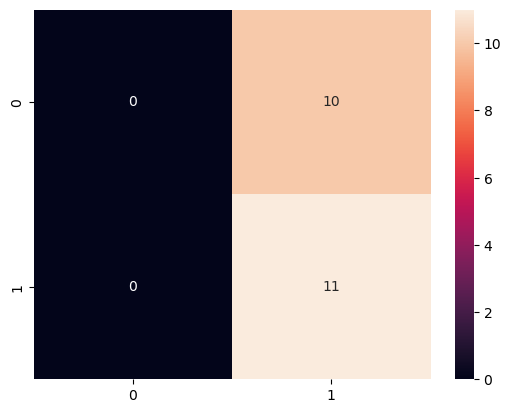

In [87]:
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True,fmt='d')